<a href="https://colab.research.google.com/github/NDsasuke/Classification-Regression-Clustering/blob/main/Clustering/Anomaly_Detection_in_Network_Traffic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing libraries

In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
import numpy as np


Preprocessing

In [8]:
# Fetch the dataset
from sklearn.datasets import fetch_kddcup99
kdd99_data = fetch_kddcup99(subset='http', random_state=0, percent10=True)
X = pd.DataFrame(kdd99_data.data)
y = pd.DataFrame(kdd99_data.target)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)

Model Building

In [9]:
# Define K-means model
kmeans = KMeans(n_clusters=2, random_state=0) # We choose 2 clusters as the data can be classified as 'normal' or 'anomalous'
kmeans.fit(X_train)

# Predict the labels 
labels = kmeans.predict(X_test)

# Find the cluster centroids
centroids = kmeans.cluster_centers_

# Measure the distance from each point to its centroid
distances = [np.linalg.norm(x-centroids[labels[i]]) for i, x in enumerate(X_test)]

# Set threshold as mean plus 2 standard deviations, points farther from the centroid than the threshold are outliers
threshold = np.mean(distances) + 2*np.std(distances)
outliers = [i for i, x in enumerate(distances) if x > threshold]

print("Number of outliers detected: ", len(outliers))


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Number of outliers detected:  171


Clustering Evaluation Metrics:
Silhouette Score: 0.7715367732757209
Calinski-Harabasz Index: 9551.007376685322
Davies-Bouldin Index: 0.22231512325688207
Anomaly Samples:
[]


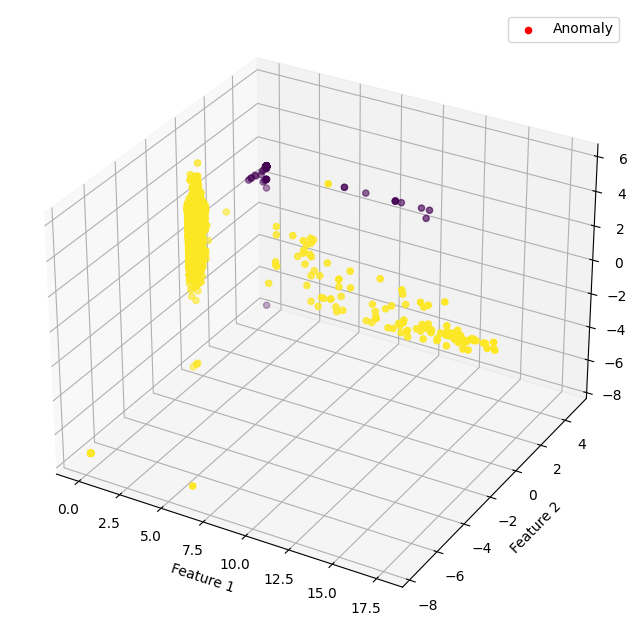

In [10]:
# Evaluate the clustering performance
print("Clustering Evaluation Metrics:")
print("Silhouette Score:", metrics.silhouette_score(X_test, labels))
print("Calinski-Harabasz Index:", metrics.calinski_harabasz_score(X_test, labels))
print("Davies-Bouldin Index:", metrics.davies_bouldin_score(X_test, labels))

# Analyze the anomalies
anomaly_indices = np.where(np.isin(labels, outliers))[0]
anomaly_samples = X_test[anomaly_indices]
print("Anomaly Samples:")
print(anomaly_samples)

# Visualize the anomalies
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=labels, cmap='viridis')
ax.scatter(anomaly_samples[:, 0], anomaly_samples[:, 1], anomaly_samples[:, 2], c='red', label='Anomaly')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend()
plt.show()


Distribution of Anomalies:

In [11]:
# Calculate the distribution of anomalies across classes
class_labels = np.unique(y_test)
anomaly_classes = y_test.iloc[anomaly_indices]

anomaly_distribution = {label: np.sum(anomaly_classes == label) for label in class_labels}
print("Anomaly Distribution by Class:")
for label, count in anomaly_distribution.items():
    print(f"Class {label}: {count} anomalies")


Anomaly Distribution by Class:
Class b'back.': 0    0.0
dtype: float64 anomalies
Class b'normal.': 0    0.0
dtype: float64 anomalies


Feature Importance: 

In [12]:
# Get feature importance scores
feature_importance = kmeans.cluster_centers_.std(axis=0)

# Sort features by importance
sorted_features = sorted(zip(X.columns, feature_importance), key=lambda x: x[1], reverse=True)

print("Feature Importance Scores:")
for feature, importance in sorted_features:
    print(f"{feature}: {importance}")


Feature Importance Scores:
1: 2.5281800358935347
2: 0.5734350205521713
0: 0.04442518735487167


Visualization of Clusters and Anomalies:

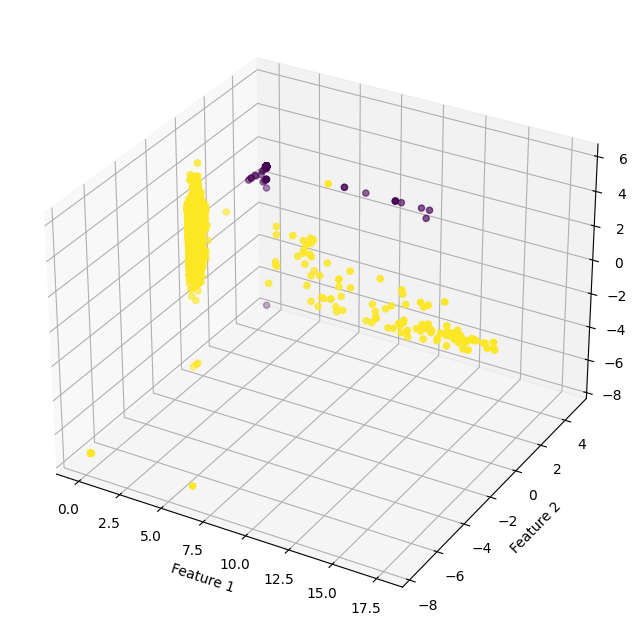

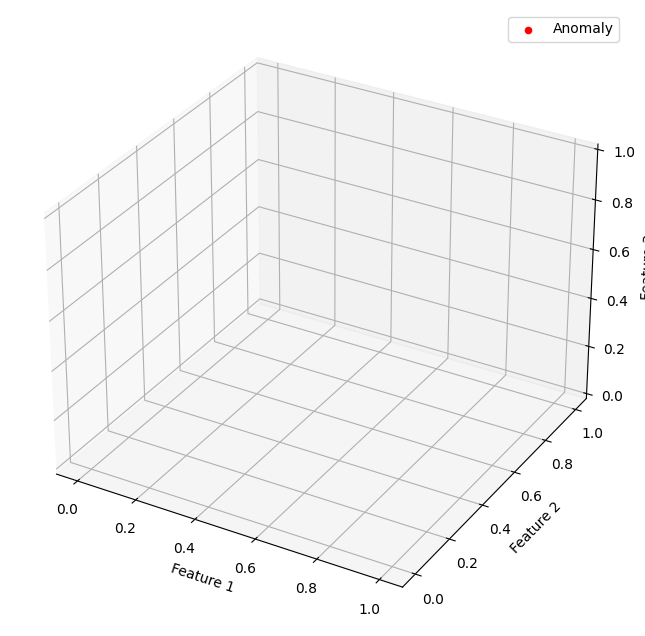

In [13]:
# Visualize the clusters
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X_test[:, 0], X_test[:, 1], X_test[:, 2], c=labels, cmap='viridis')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.show()

# Visualize the anomalies only
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(anomaly_samples[:, 0], anomaly_samples[:, 1], anomaly_samples[:, 2], c='red', label='Anomaly')
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')
plt.legend()
plt.show()
